In [3]:
import numpy as np
import matplotlib.pyplot as plt
#%pylab qt5
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Read in RV data from gituhub file
t, prv, perr, srv, serr = np.loadtxt('3955867.dat', delimiter=';', unpack=True)
#print t, prv, perr, srv, serr

#Define variables from Villanova
p = 33.6599615
t_pe = 54960.825756-54833

In [5]:
#Phase data
phase = ((t-t_pe)%p)/p
#print phase

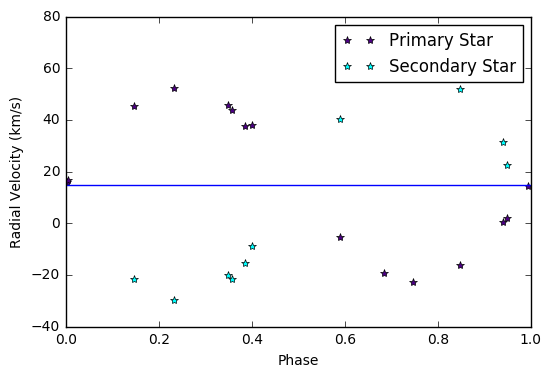

In [6]:
#Plot RVs
plt.figure()
plt.plot(phase, prv, '*', color='indigo', label='Primary Star')
plt.plot(phase, srv, '*', color='aqua', label='Secondary Star')
plt.axhline(14.7, color = 'blue')
plt.xlabel('Phase')
plt.ylabel('Radial Velocity (km/s)')
plt.legend()
plt.savefig('3955867.png')
plt.show()

In [7]:
#Finding indivudual masses
pi = np.pi
e = 0

def find_Masses(k1, k2, p, e=0):
    alpha = (2*pi*6.67e-11)/((p*3600*24)*(1-e**2)**1.5)
    x = k2/k1
    y = k1/k2
    m1 = (y/(1+x)**2) + (1/((1+y)**2))
    m1 = m1 * alpha
    m1 = (k1**3 + k2**3)/m1
    m2 = y * m1
    return m1, m2


In [8]:
m1, m2 = find_Masses(38.43*1e3, 46.55*1e3, p, e=.3)
M1 = m1 / (1.99e30)
M2 = m2 / (1.99e30)
print M1, M2

1.01761571699 0.840106809966


In [9]:
run apogee_lcs.py 3955867

/astro/apps6/anaconda2.0/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Isodata.cat already exists; loaded.
LC data for KIC 3955867 loaded.
Excluding  []
Clip tolerance = 1.0


In [10]:
print frat
print 0.2**2.5
print tpe, ecosw, esinw

0.38242280285
0.01788854382
127.825756 0.00486946861306 0.0644257703081


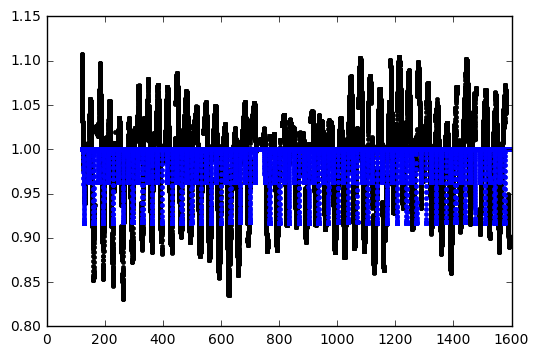

In [11]:

lcpars= [M1+M2, 10, 1/0.2, period, 127.9, esinw, ecosw, .01, 11., q1, q2, q3, q4]
model_fluxes, model_polynomials = keblat.lcfit(lcpars, keblat.jd, keblat.quarter, keblat.flux, keblat.dflux, keblat.crowd, polyorder=0)
plt.plot(keblat.jd, keblat.flux, "k.")
plt.plot(keblat.jd, model_fluxes*model_polynomials, ".")
plt.show()
#lcmod, lcpol = keblat.lcfit(lcpars_array, keblat.jd, keblat.quarter, keblat.flux, keblat.dflux, keblat.crowd, polyorder=0)

In [12]:
keblat.parbounds['b'][1] = 0.1
keblat.parbounds['ecosw'] = [-.01, .01]
keblat.parbounds['period'] = [period*.99, period*1.01]

In [13]:
opt_lcpars0 = opt_lc(msum=M1+M2, rsum=10, rrat=1./0.2, period=period, tpe=127.9, esinw=esinw,
                             ecosw=ecosw, b=0.001, frat=11, q1=q1, q2=q2, q3=q3, q4=q4)


==================== Starting LIGHTCURVE ONLY fit... =====================
[[Fit Statistics]]
    # function evals   = 71
    # data points      = 14071
    # variables        = 7
    chi-square         = 8867922.115
    reduced chi-square = 630.541
    Akaike info crit   = 90716.790
    Bayesian info crit = 90769.653
[[Variables]]
    q1:       0.01 (fixed)
    q2:       0.01 (fixed)
    tpe:      127.828837 +/- 0.000603 (0.00%) (init= 127.9)
    b:        8.7986e-05 +/- 6.090602 (6922246.36%) (init= 0.001)
    ecosw:    0.00556632 +/- 8.91e-05 (1.60%) (init= 0.004869469)
    q4:       0.01 (fixed)
    rsum:     8.82140012 +/- 0.067121 (0.76%) (init= 10)
    period:   33.65996 (fixed)
    q3:       0.01 (fixed)
    msum:     1.857723 (fixed)
    frat:     26.4482516 +/- 0.055020 (0.21%) (init= 11)
    rrat:     8.46317851 +/- 0.022396 (0.26%) (init= 5)
    esinw:   -0.01467988 +/- 0.001367 (9.32%) (init= 0.06442577)
[[Correlations]] (unreported correlations are <  0.100)
    C(b, rsum

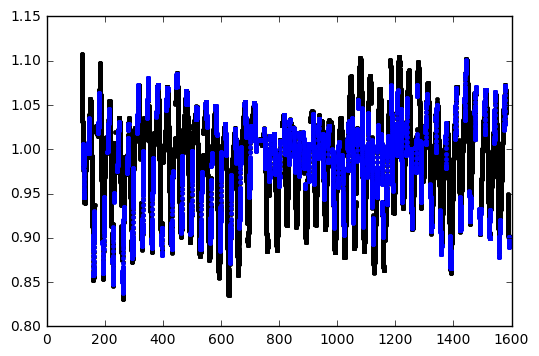

In [15]:
keblat.updatephase(opt_lcpars0[4], opt_lcpars0[3])
modelfluxes, modelpolynomials = keblat.lcfit(opt_lcpars0, keblat.jd[keblat.clip], keblat.quarter[keblat.clip], keblat.flux[keblat.clip], keblat.dflux[keblat.clip], keblat.crowd[keblat.clip], polyorder=2)
plt.plot(keblat.jd, keblat.flux, "k.")
plt.plot(keblat.jd[keblat.clip], modelfluxes*modelpolynomials, ".")
plt.show()

In [16]:
print modelfluxes, modelpolynomials, opt_lcpars0

[ 1.  1.  1. ...,  1.  1.  1.] [ 1.00598386  1.00563967  1.0049588  ...,  0.89023312  0.89013385
  0.89003638] [  2.16775192e+00   8.70856957e+00   8.76542200e+00   3.36567383e+01
   1.27900914e+02   6.75090247e-03   5.19553004e-03   8.79859217e-05
   2.63876455e+01   8.54156545e-02   7.77455163e-01   1.40917842e-01
   6.86386967e-03]


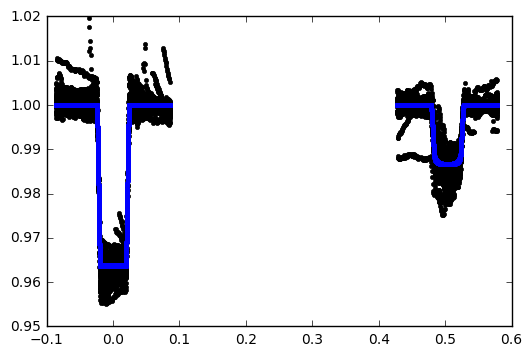

In [17]:
plt.plot(keblat.phase[keblat.clip], keblat.flux[keblat.clip]/modelpolynomials, "k.")
plt.plot(keblat.phase[keblat.clip], modelfluxes, ".")
plt.show()

In [18]:
keblat.rvprep(t, prv*1e3, srv*1e3, perr*1e3, serr*1e3)

(1.1052070070547533, 0.91309709246593695, 15980.0)

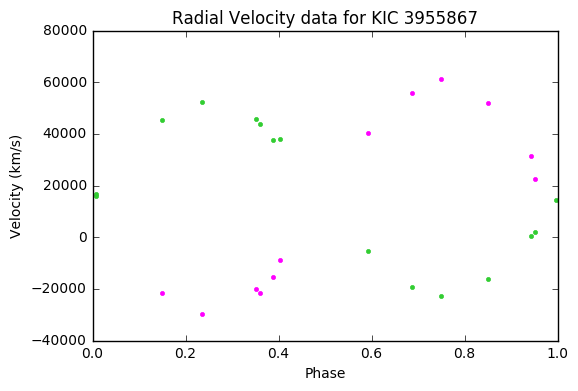

In [19]:
#Have to phase the data again becuase parameters have changed from optimization
phase2 = ((keblat.rv_t-keblat.pars['tpe'])%keblat.pars['period'])/keblat.pars['period']

plt.title('Radial Velocity data for KIC 3955867')
plt.plot(phase2, keblat.rv1_obs, '.', color='limegreen')
plt.plot(phase2, keblat.rv2_obs, '.', color='fuchsia')
plt.xlabel('Phase')
plt.ylabel('Velocity (km/s)');

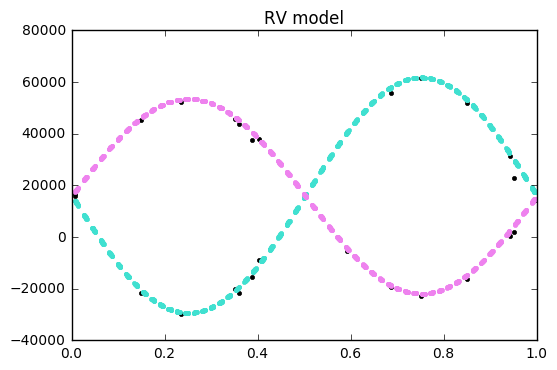

In [25]:
#Create more data points to see model clearly
tmod = np.linspace(keblat.rv_t[0], keblat.rv_t[-1], 1000)
phasemod = ((tmod - keblat.pars['tpe'])%keblat.pars['period'])/keblat.pars['period']

rv1_mod, rv2_mod = keblat.rvfit([0.91+1.1, 1.1/0.91, keblat.pars['period'], keblat.pars['tpe'], 
                                 .0001, keblat.pars['ecosw'],
                                 keblat.pars['inc'], 16*1e3, 0.0], tmod)

plt.title('RV model')
plt.plot(phase2, keblat.rv1_obs, 'k.', label='Observed Data')
plt.plot(phase2, keblat.rv2_obs, 'k.')
plt.plot(phasemod, rv1_mod, '.', color='turquoise', label='Primary Star Model')
plt.plot(phasemod, rv2_mod, '.', color='violet', label='Secondary Star Model')
#plt.legend();

In [37]:
print keblat.pars['ecosw']
print opt_lcpars0

-0.00999999999778
[  2.16775192e+00   8.70856957e+00   8.76542200e+00   3.36567383e+01
   1.27900914e+02   6.75090247e-03   5.19553004e-03   8.79859217e-05
   2.63876455e+01   8.54156545e-02   7.77455163e-01   1.40917842e-01
   6.86386967e-03]


In [42]:
keblat.parbounds['msum']= [0.98*(1.1+0.91), 1.02*(1.1+0.91)]
keblat.parbounds['mrat']= [0.98*(1.1/0.91), 1.02*(1.1/0.91)]
keblat.parbounds['esinw']= [-0.1,0.1]


opt_rvpars = opt_rv(msum=1.1+0.91, mrat=1.1/0.91, period=period, tpe=tpe, 
       esinw=.0001, ecosw=opt_lcpars0[6], inc=keblat.pars['inc'], k0=16*1e3, rverr=0.0)
#msum=M1+M2, rsum=10, rrat=1./0.2, period=period, tpe=127.9, esinw=esinw,
                #             ecosw=ecosw, b=0.001, frat=11, q1=q1, q2=q2, q3=q3, q4=q4

rverr 0.0
tpe 127.825756
ecosw 0.00519553004304
mrat 1.20879120879
period 33.6599615
msum 2.01
k0 16000.0
esinw 0.0001
inc 1.57079494522
========================= Starting RV ONLY fit... ========================
Parameters([('rverr', <Parameter 'rverr', value=0.0 (fixed), bounds=[0.0:10000.0]>), ('tpe', <Parameter 'tpe', value=127.82575599999836 (fixed), bounds=[0.0:100000000.0]>), ('ecosw', <Parameter 'ecosw', 0.0051955300430434302, bounds=[-0.01:0.01]>), ('mrat', <Parameter 'mrat', 1.208791208791209, bounds=[1.1846153846153848:1.232967032967033]>), ('period', <Parameter 'period', value=33.659961500000001 (fixed), bounds=[33.323361885000004:33.996561114999999]>), ('msum', <Parameter 'msum', 2.0100000000000002, bounds=[1.9698000000000002:2.0502000000000002]>), ('k0', <Parameter 'k0', 16000.0, bounds=[-100000000.0:100000000.0]>), ('esinw', <Parameter 'esinw', 0.0001, bounds=[-0.1:0.1]>), ('inc', <Parameter 'inc', 1.5707949452219605, bounds=[0.0:1.5707963267948966]>)])
21807.7726465 2803

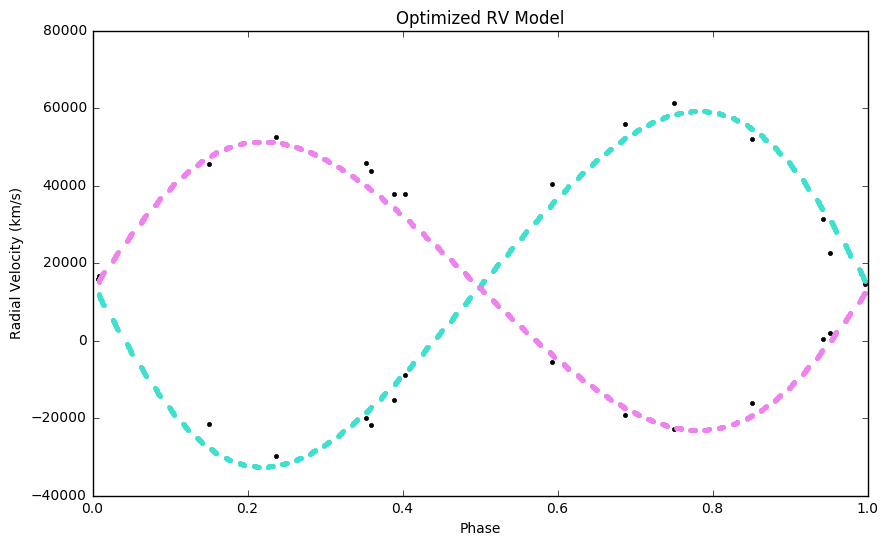

In [44]:
opt_rv1_mod, opt_rv2_mod = keblat.rvfit(opt_rvpars, tmod)

plt.figure(figsize=(10,6))
plt.title('Optimized RV Model')
plt.plot(phase2, keblat.rv1_obs, 'k.', label='Observed Data')
plt.plot(phase2, keblat.rv2_obs, 'k.')
plt.plot(phasemod, opt_rv1_mod, '.', color='turquoise', label='Optimized Primary Star Model')
plt.plot(phasemod, opt_rv2_mod, '.', color='violet', label='Optimized Secondary Star Model')
#plt.legend()
plt.xlabel('Phase')
plt.ylabel('Radial Velocity (km/s)');